# **LINKEDIN ANALYSIS | EXTENSIVE FEATURE ENGINEERING + DATA VISUALIZATIONS**

# Importing Libraries

In [21]:
library(dplyr)
library(ggplot2)
library(stringr)
library(tidyr)

# Exploring Data

In [10]:
df <- read.csv("/home/anderson/Documentos/Portfollio-Data-science/linkdin_Job_data.csv")
str(df)

'data.frame':	7927 obs. of  16 variables:
 $ job_ID            : num  3.47e+09 3.47e+09 3.47e+09 3.47e+09 3.47e+09 ...
 $ job               : Factor w/ 2992 levels "",".NET Architect",..: 680 680 668 658 658 658 680 2567 783 2567 ...
 $ location          : Factor w/ 152 levels "","Agra, Uttar Pradesh, India",..: 31 98 43 55 92 55 16 32 55 55 ...
 $ company_id        : logi  NA NA NA NA NA NA ...
 $ company_name      : Factor w/ 2496 levels "","_VOIS","(EEC) Enbee Education Center Private Limited",..: 534 534 2306 1713 2203 78 534 604 1218 54 ...
 $ work_type         : Factor w/ 4 levels "","Hybrid","On-site",..: 4 4 4 3 3 3 4 3 2 2 ...
 $ full_time_remote  : Factor w/ 24 levels "","1-10 employees",..: 11 11 16 10 10 13 11 10 10 1 ...
 $ no_of_employ      : Factor w/ 270 levels "","1-10 employees",..: 39 39 39 2 2 107 39 239 134 1 ...
 $ no_of_application : Factor w/ 203 levels "","1","10","100",..: 110 92 110 110 175 110 110 108 164 202 ...
 $ posted_day_ago    : Factor w/ 92 levels ""

**We are going to select columns that will be used for this analysis**

In [11]:
df <- df %>% 
  select(-job_ID,-company_id,-company_name,-Hiring_person,-hiring_person_link,-job_details,-Column1,-alumni)

**Let's see NA values**

In [12]:
sapply(df, function(x){sum(is.na(x))})

job           location          work_type   full_time_remote 
                 0                  0                  0                  0 
      no_of_employ  no_of_application     posted_day_ago linkedin_followers 
                 0                  0                  0                  0

**We need to check uniques as well**

In [13]:
sapply(df, function(x){length(unique(x))})

job           location          work_type   full_time_remote 
              2992                152                  4                 24 
      no_of_employ  no_of_application     posted_day_ago linkedin_followers 
               270                203                 92               3936

In [14]:
unique(df$full_time_remote)

[1] Full-time · Associate        Full-time · Mid-Senior level
 [3] Full-time                    Full-time · Entry level     
 [5]                              Contract                    
 [7] Contract · Associate         Contract · Mid-Senior level 
 [9] Full-time · Director         Internship                  
[11] Contract · Entry level       Full-time · Executive       
[13] Part-time                    Part-time · Mid-Senior level
[15] Temporary                    Internship · Internship     
[17] 11-50 employees              Full-time · Internship      
[19] Associate                    1-10 employees              
[21] Internship · Entry level     Part-time · Associate       
[23] Volunteer                    Contract · Executive        
24 Levels:  1-10 employees 11-50 employees Associate ... Volunteer

**This column is mixing values of different types like level, no of employees and work type we will work without this.**
**Below we are going to check how many jobs we have with these key words**

In [15]:
str_detect(str_to_lower(df$job),"^bi|analytics|statician|tableau|powerbi|power bi|dev|developer|data") %>% sum()

[1] 3957

# Feature Engineering
**We are going to divide these jobs in three main categories, because we have so much job titles**

In [16]:
df$job_field <- case_when(
  str_detect(str_to_lower(df$job),"developer|dev") ~ "dev",
  str_detect(str_to_lower(df$job),"^bi|analytics|statician|tableau|powerbi|power bi|data") ~ "data",
  TRUE ~ "other"
)

head(df)

job,location,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,linkedin_followers,job_field
"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Consulting",200,8 hours,"5,395,547 followers",data
"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Consulting",184,8 hours,"5,395,547 followers",data
Data Analyst - WFH,Greater Bengaluru Area,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Consulting",200,9 hours,,data
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time,1-10 employees,200,7 hours,"2,094 followers",data
Data Analyst,"Mohali district, Punjab, India",On-site,Full-time,1-10 employees,8,26 minutes,,data
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200,10 hours,"972,657 followers",data


**Now We are going to separate to transform later, posted day ago in minutes**

In [22]:
df <- separate(data = df, col = posted_day_ago, into = c("no_posted_day_ago","unit_posted_day_ago"))
head(df)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 7 rows [1878, 2853, 3004,
6137, 6487, 6930, 7677].”


job,location,work_type,full_time_remote,no_of_employ,no_of_application,no_posted_day_ago,unit_posted_day_ago,linkedin_followers,job_field
"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Consulting",200,8,hours,"5,395,547 followers",data
"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Consulting",184,8,hours,"5,395,547 followers",data
Data Analyst - WFH,Greater Bengaluru Area,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Consulting",200,9,hours,,data
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time,1-10 employees,200,7,hours,"2,094 followers",data
Data Analyst,"Mohali district, Punjab, India",On-site,Full-time,1-10 employees,8,26,minutes,,data
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200,10,hours,"972,657 followers",data


In [23]:
df$unit_posted_day_ago <- case_when(
  str_detect(string = df$unit_posted_day_ago, pattern = "^hou") ~ 60,
  str_detect(string = df$unit_posted_day_ago, pattern = "^min") ~ 1,
  str_detect(string = df$unit_posted_day_ago, pattern = "^day") ~ 24*60,
  str_detect(string = df$unit_posted_day_ago, pattern = "^wee") ~ 7*24*60,
  str_detect(string = df$unit_posted_day_ago, pattern = "^sec") ~ 1/60
)

df$minutes_posted_ago <- df$unit_posted_day_ago * as.numeric(df$no_posted_day_ago)

**Now we are going to transform followers to numeric**

In [24]:
df$linkedin_followers <- str_replace_all(df$linkedin_followers,pattern = "[[:punct:]]",replacement = "") %>% 
                          str_replace(pattern = " followers| follower", replacement = "") %>%
                          as.numeric()

Warning message in str_replace_all(df$linkedin_followers, pattern = "[[:punct:]]", :
“NAs introduzidos por coerção”


**We need also to separate the number of employees from company field**

In [25]:
df <- separate(data = df, col = no_of_employ, sep = "·", into = c("no_employees","company_field"))
head(df)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2962 rows [4, 5, 8, 9,
10, 11, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 29, 31, 32, ...].”


job,location,work_type,full_time_remote,no_employees,company_field,no_of_application,no_posted_day_ago,unit_posted_day_ago,linkedin_followers,job_field,minutes_posted_ago
"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000 employees",IT Services and IT Consulting,200,8,60,5395547,data,480
"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000 employees",IT Services and IT Consulting,184,8,60,5395547,data,480
Data Analyst - WFH,Greater Bengaluru Area,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees",IT Services and IT Consulting,200,9,60,NA,data,540
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time,1-10 employees,NA,200,7,60,2094,data,420
Data Analyst,"Mohali district, Punjab, India",On-site,Full-time,1-10 employees,NA,8,26,1,NA,data,26
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time · Entry level,"10,001+ employees",Telecommunications,200,10,60,972657,data,600


**We are going to transform no_employees until we can transform it on a factor**

In [26]:
unique(df$no_employees)
length(unique(df$no_employees))

[1] "1,001-5,000 employees "  "1-10 employees"         
 [3] "10,001+ employees "      "51-200 employees"       
 [5] "201-500 employees"       ""                       
 [7] "11-50 employees"         "501-1,000 employees "   
 [9] "1,001-5,000 employees"   "5,001-10,000 employees "
[11] "51-200 employees "       "501-1,000 employees"    
[13] "11-50 employees "        "1-10 employees "        
[15] "201-500 employees "      "5,001-10,000 employees" 
[17] "10,001+ employees"

[1] 17

In [27]:
str_remove_all(df$no_employees,pattern = " ") %>% unique() %>% length()

[1] 9

In [28]:
df$no_employees <- str_remove_all(df$no_employees,pattern = " ") %>% 
                      str_remove_all(pattern = "employees")

**Here we are going to impute NA values for empty values for two different columns**

In [29]:
df[df$no_employees == "", "no_employees"] <- NA
df[df$work_type == "", "work_type"] <- NA

**Let's look another time to see what's next**

In [30]:
head(df)

job,location,work_type,full_time_remote,no_employees,company_field,no_of_application,no_posted_day_ago,unit_posted_day_ago,linkedin_followers,job_field,minutes_posted_ago
"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000",IT Services and IT Consulting,200,8,60,5395547,data,480
"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Remote,Full-time · Associate,"1,001-5,000",IT Services and IT Consulting,184,8,60,5395547,data,480
Data Analyst - WFH,Greater Bengaluru Area,Remote,Full-time · Mid-Senior level,"1,001-5,000",IT Services and IT Consulting,200,9,60,NA,data,540
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time,1-10,NA,200,7,60,2094,data,420
Data Analyst,"Mohali district, Punjab, India",On-site,Full-time,1-10,NA,8,26,1,NA,data,26
Data Analyst,"Gurugram, Haryana, India",On-site,Full-time · Entry level,"10,001+",Telecommunications,200,10,60,972657,data,600


**Let's separate location in three columns**

In [31]:
df <- separate(df, location, into = c("city","state","country"), sep = ", ")
head(df)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 1300 rows [3, 8, 16, 18,
21, 28, 33, 37, 40, 41, 43, 44, 45, 49, 58, 69, 76, 87, 92, 93, ...].”


job,city,state,country,work_type,full_time_remote,no_employees,company_field,no_of_application,no_posted_day_ago,unit_posted_day_ago,linkedin_followers,job_field,minutes_posted_ago
"Data Analyst, Trilogy (Remote) - $60,000/year USD",Delhi,Delhi,India,Remote,Full-time · Associate,"1,001-5,000",IT Services and IT Consulting,200,8,60,5395547,data,480
"Data Analyst, Trilogy (Remote) - $60,000/year USD",New Delhi,Delhi,India,Remote,Full-time · Associate,"1,001-5,000",IT Services and IT Consulting,184,8,60,5395547,data,480
Data Analyst - WFH,Greater Bengaluru Area,NA,NA,Remote,Full-time · Mid-Senior level,"1,001-5,000",IT Services and IT Consulting,200,9,60,NA,data,540
Data Analyst,Gurugram,Haryana,India,On-site,Full-time,1-10,NA,200,7,60,2094,data,420
Data Analyst,Mohali district,Punjab,India,On-site,Full-time,1-10,NA,8,26,1,NA,data,26
Data Analyst,Gurugram,Haryana,India,On-site,Full-time · Entry level,"10,001+",Telecommunications,200,10,60,972657,data,600


**Let's delete some columns we are not going to use anymore**

In [32]:
df <- df %>% 
  select(-no_posted_day_ago,-unit_posted_day_ago, -full_time_remote, -country)

**Now we will Work with NA's after featuring engineering**

In [33]:
sapply(df, function(x){sum(is.na(x))})

job               city              state          work_type 
                 0                  0               1072                191 
      no_employees      company_field  no_of_application linkedin_followers 
               324               2962                  0               3147 
         job_field minutes_posted_ago 
                 0                  7

**Above we see inconsistent data, because no_of_application contains "hours" as its mode, so we have to impute NA for these values and after that try to impute numbers on this column**

In [34]:
df$no_of_application <- as.numeric(df$no_of_application)

**Finding mode values to replace NA's**

In [35]:
fmode <- function(x){
  names(sort(table(x),decreasing = T))[1]
}

mode_vec <- sapply(df, fmode)
data.frame(mode = mode_vec)

,mode
job,Lead Java Software Engineer
city,Bengaluru
state,Karnataka
work_type,On-site
no_employees,"1,001-5,000"
company_field,IT Services and IT Consulting
no_of_application,200
linkedin_followers,449483
job_field,other
minutes_posted_ago,1440


**Replacing NA's with mode**

In [36]:
df %>% head()

job,city,state,work_type,no_employees,company_field,no_of_application,linkedin_followers,job_field,minutes_posted_ago
"Data Analyst, Trilogy (Remote) - $60,000/year USD",Delhi,Delhi,Remote,"1,001-5,000",IT Services and IT Consulting,110,5395547,data,480
"Data Analyst, Trilogy (Remote) - $60,000/year USD",New Delhi,Delhi,Remote,"1,001-5,000",IT Services and IT Consulting,92,5395547,data,480
Data Analyst - WFH,Greater Bengaluru Area,NA,Remote,"1,001-5,000",IT Services and IT Consulting,110,NA,data,540
Data Analyst,Gurugram,Haryana,On-site,1-10,NA,110,2094,data,420
Data Analyst,Mohali district,Punjab,On-site,1-10,NA,175,NA,data,26
Data Analyst,Gurugram,Haryana,On-site,"10,001+",Telecommunications,110,972657,data,600


In [37]:
for (i in 1:length(mode_vec)) {
  df[,i] <- ifelse(is.na(df[,i]), mode_vec[i], df[,i])
}

**Transforming no_employees in factor**

In [38]:
l <- c("1-10","11-50","51-200","201-500","501-1,000","1,001-5,000","5,001-10,000","10,001+")
df$no_employees <- factor(df$no_employees, levels = l)

**Let's convert our numeric variables which are characters**

In [39]:
df <- df %>% 
  mutate(
    no_of_application = as.numeric(no_of_application),
    linkedin_followers = as.numeric(linkedin_followers),
    minutes_posted_ago = as.numeric(minutes_posted_ago)
  )

## **Now our data is good! let's create some visualizations ;)**

# **Data Visualizations**

In [40]:
# Adjusting size of ggplot
library(repr)
options(repr.plot.width=15, repr.plot.height=10)

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


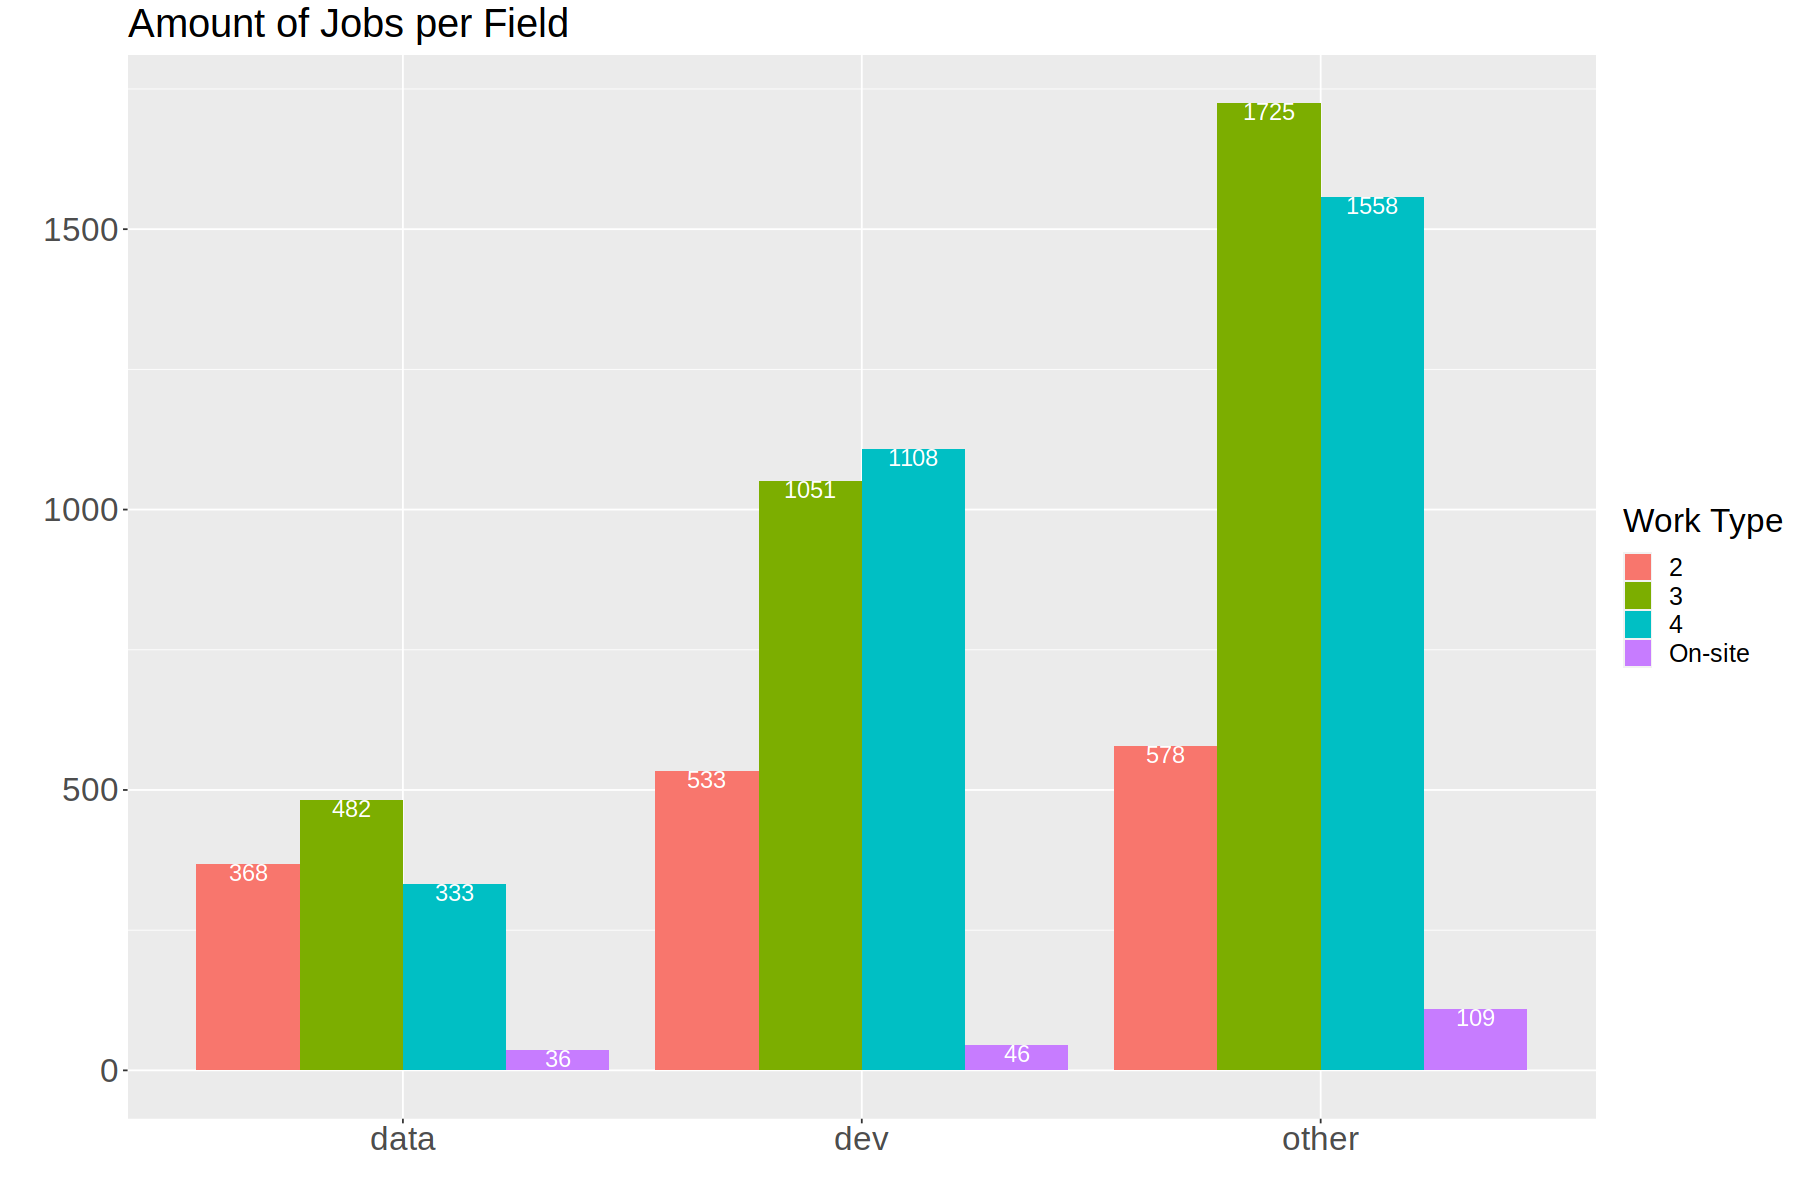

In [41]:
ggplot(df, aes(job_field, fill = work_type))+
  geom_bar(position = "dodge")+
  labs(title = "Amount of Jobs per Field", fill = "Work Type")+
  geom_text(aes(label = ..count..),stat = "count", size = 5, color = "white", position = position_dodge(width=0.9), vjust = 1)+
  xlab("")+
  ylab("")+
  theme(title = element_text(size = 20),
       axis.text = element_text(size = 20),
       legend.text = element_text(size = 15))

**We see that for Data field jobs companies prefer the professionals on site or Hybrid. We can also see that Devs have more flexibility wwith remote jobs. For other jobs on site is preferable by companies.**

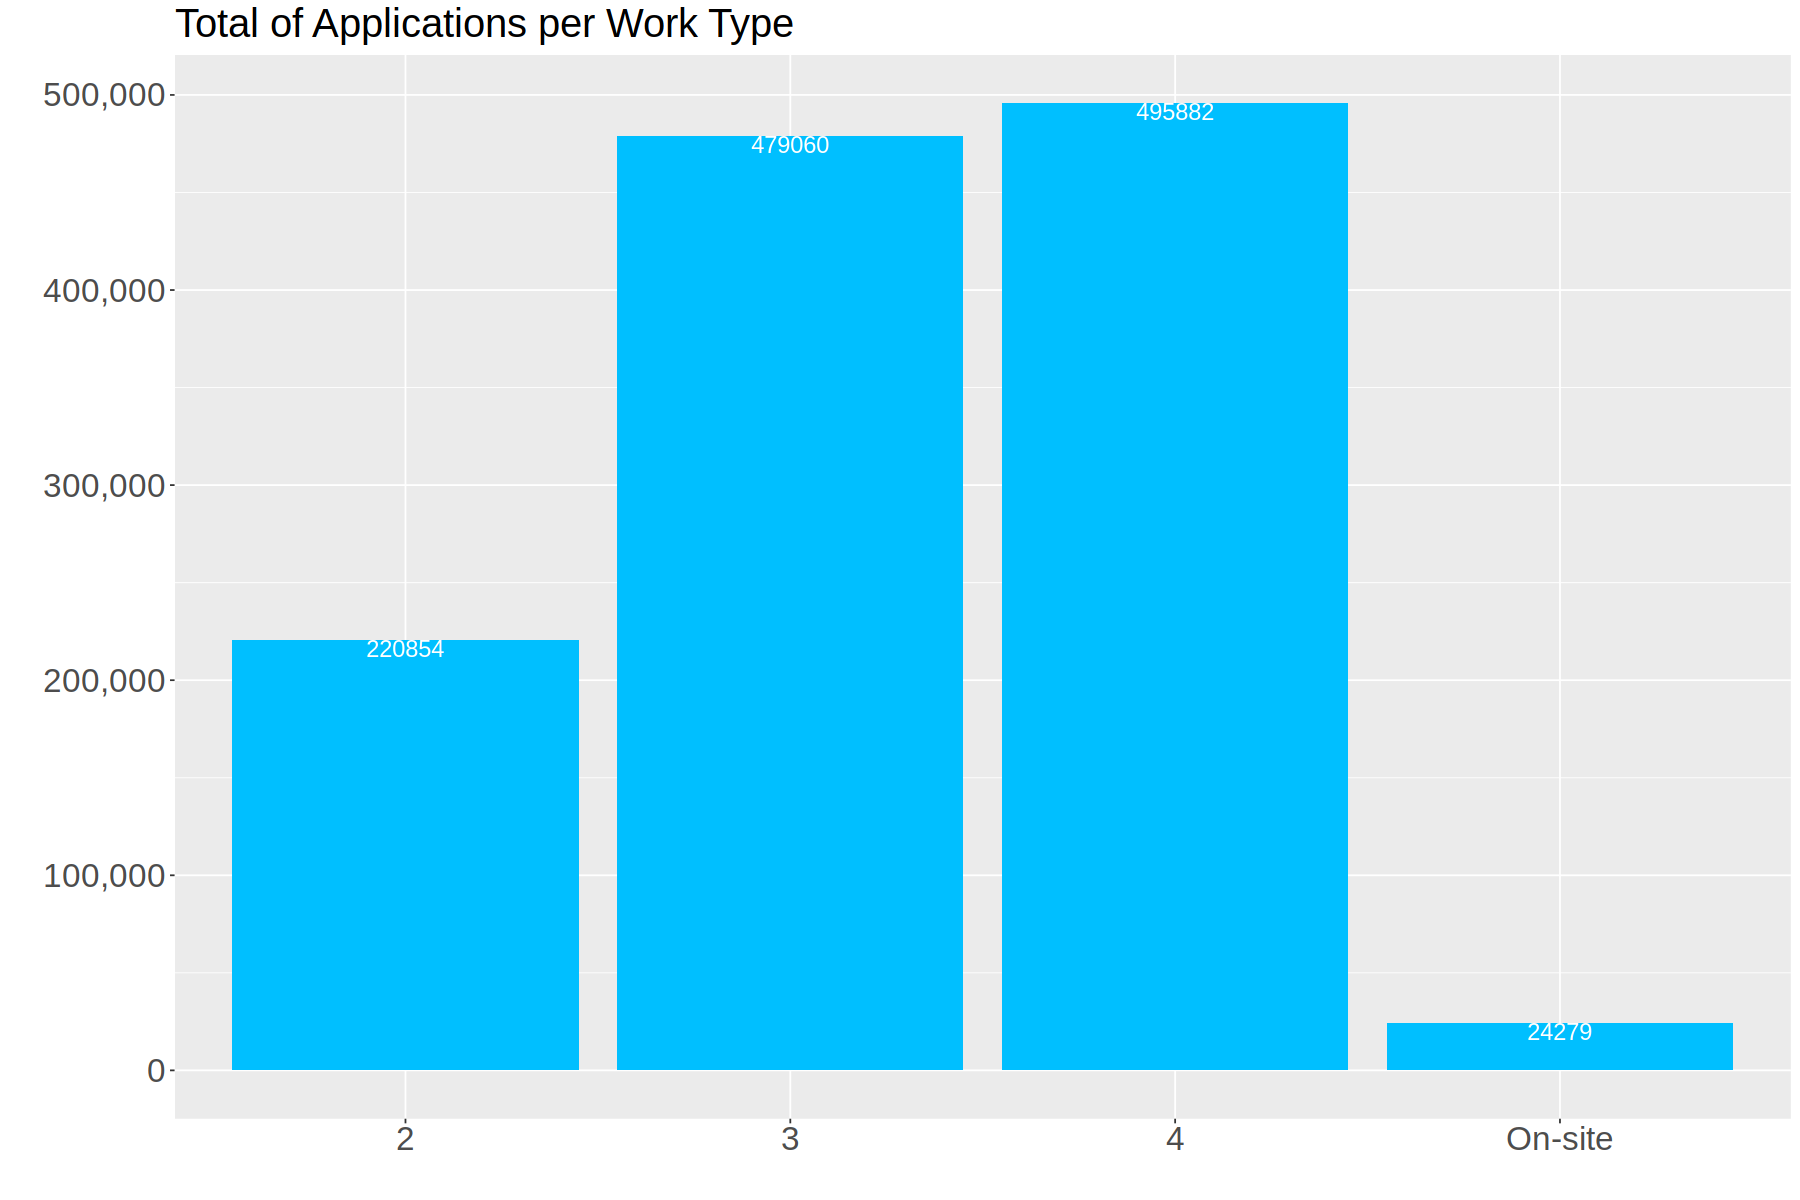

In [42]:
df %>% 
  group_by(work_type) %>% 
  summarise(qtt = sum(no_of_application)) %>% 
ggplot(aes(work_type, qtt))+
  geom_col(fill = "deepskyblue")+
  labs(title = "Total of Applications per Work Type")+
  geom_text(aes(label = qtt), vjust = 1, size = 5, color = "white")+
  xlab("")+
  ylab("")+
  scale_y_continuous(labels = scales::comma)+
  theme(title = element_text(size = 20),
       axis.text = element_text(size = 20),
       legend.text = element_text(size = 15))

**Applicants of course want to work at home.**

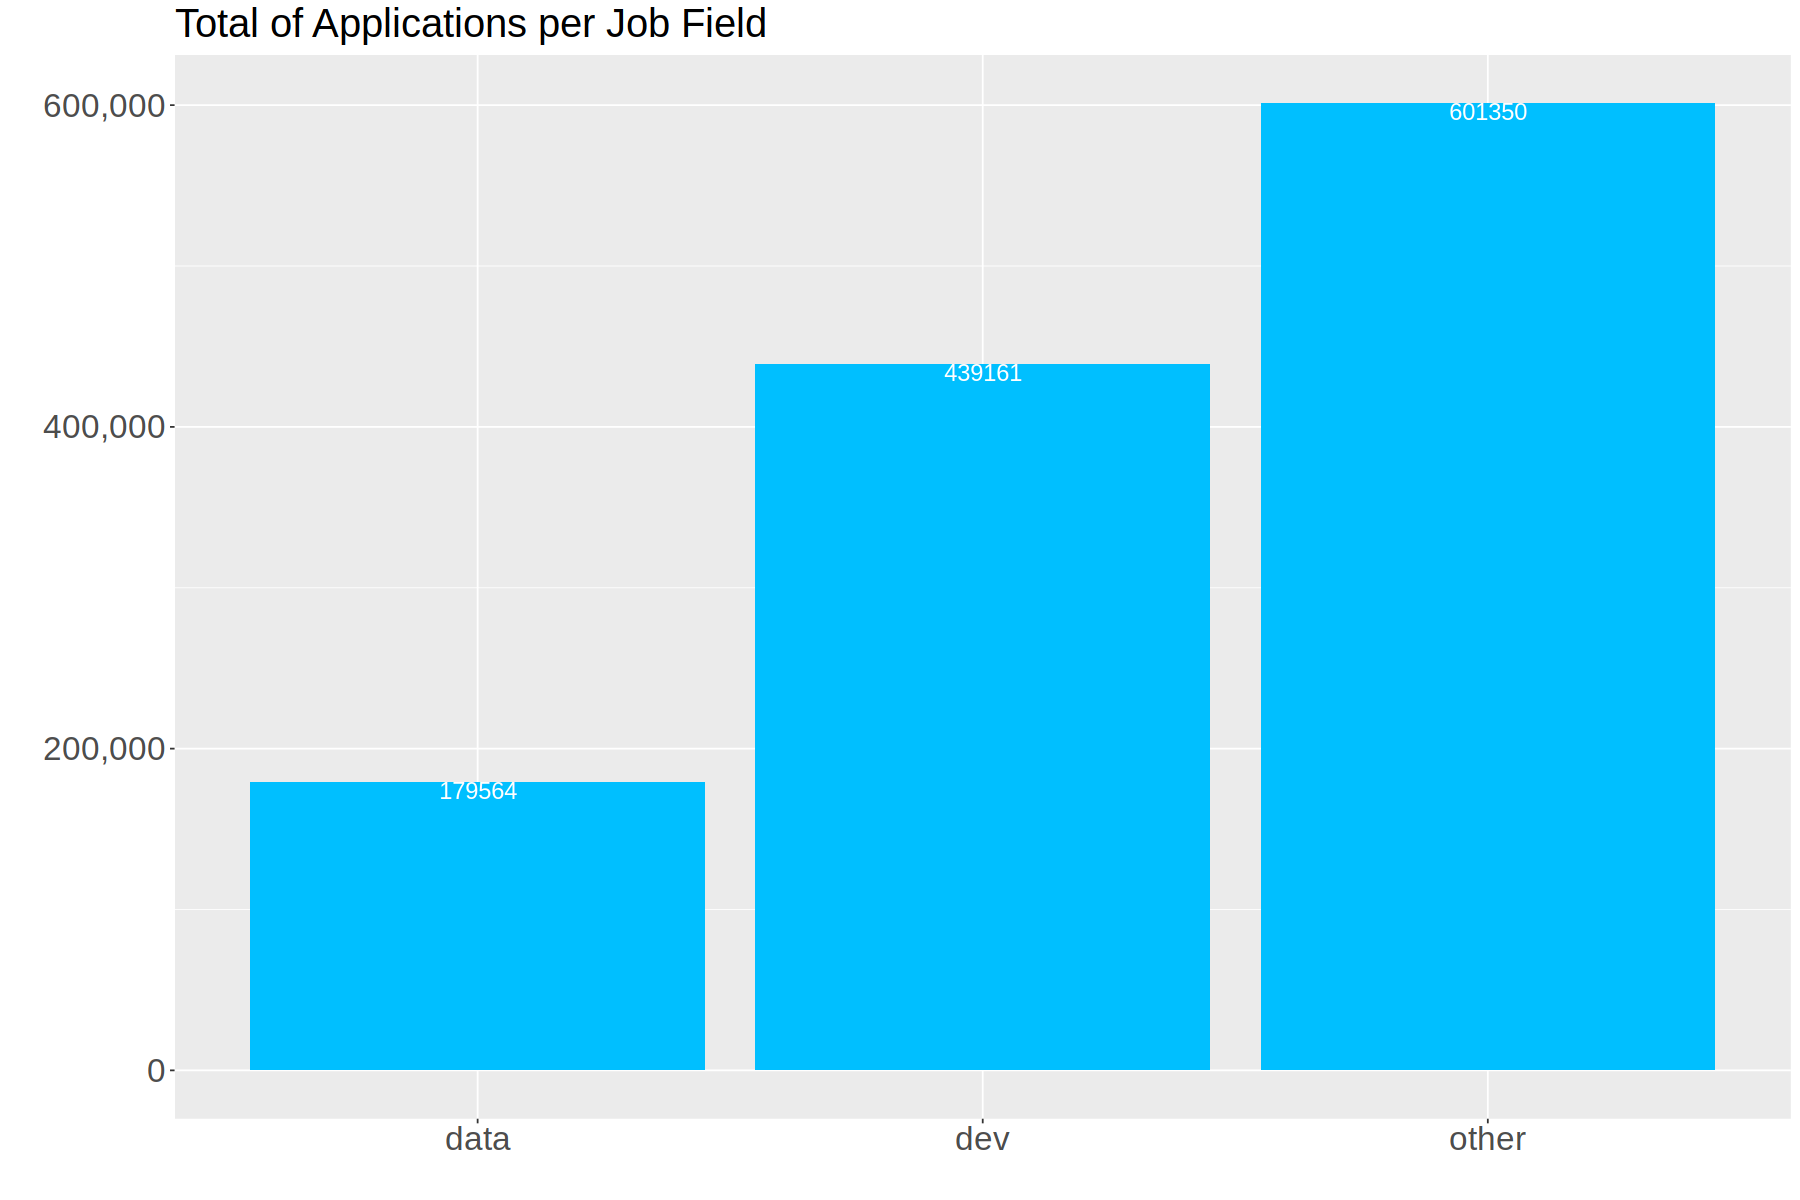

In [43]:
df %>% 
  group_by(job_field) %>% 
  summarise(qtt = sum(no_of_application)) %>% 
ggplot(aes(job_field, qtt))+
  geom_col(fill = "deepskyblue")+
  labs(title = "Total of Applications per Job Field")+
  geom_text(aes(label = qtt), vjust = 1, size = 5, color = "white")+
  xlab("")+
  ylab("")+
  scale_y_continuous(labels = scales::comma)+
  theme(title = element_text(size = 20),
       axis.text = element_text(size = 20),
       legend.text = element_text(size = 15))

**Dev jobs have almost two times applications than Data jobs**

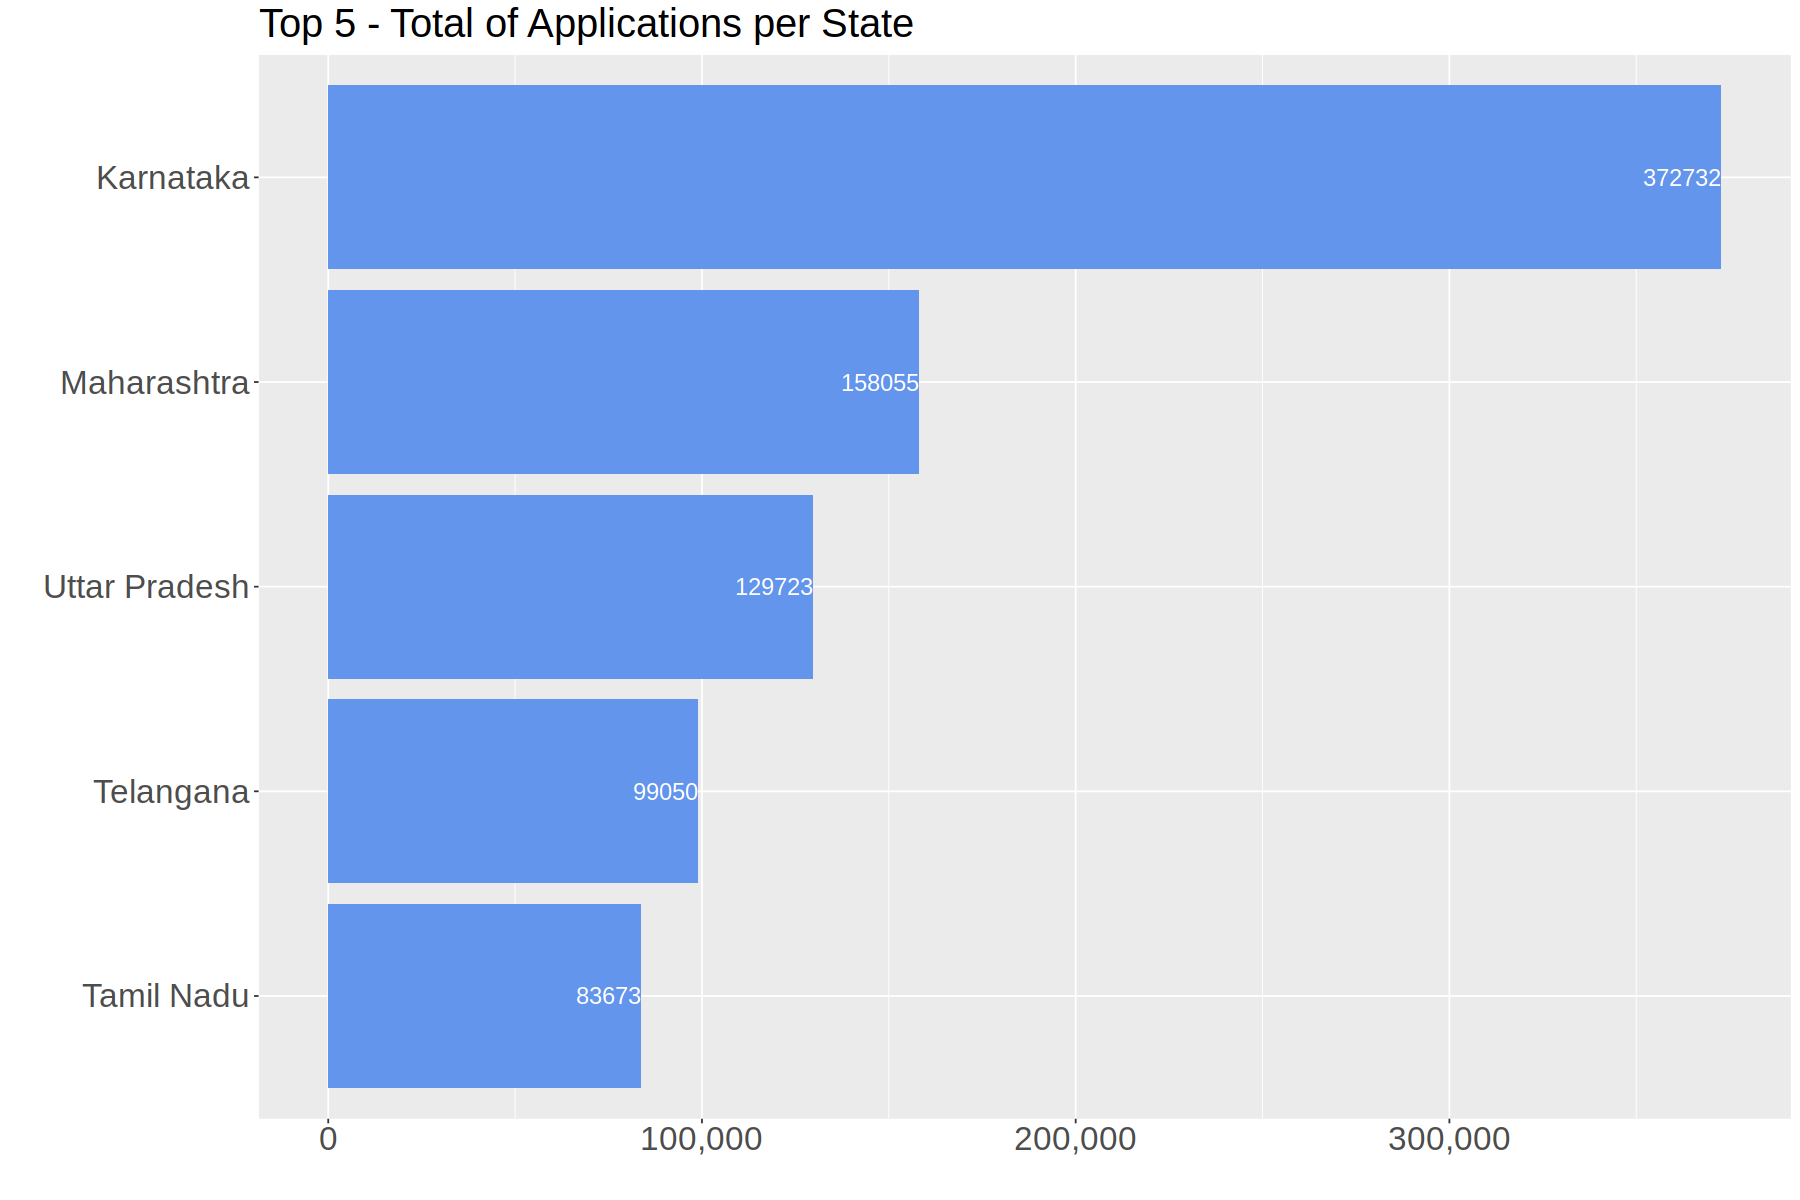

In [44]:
df %>% 
  group_by(state) %>% 
  summarise(qtt = sum(no_of_application)) %>%
  arrange(desc(qtt)) %>% 
  head(5) %>% 
ggplot(aes(qtt, reorder(state, qtt)))+
  geom_col(fill = "cornflowerblue")+
  labs(title = "Top 5 - Total of Applications per State")+
  geom_text(aes(label = qtt), hjust = 1, size = 5, color = "white")+
  xlab("")+
  ylab("")+
  scale_x_continuous(labels = scales::comma)+
  theme(title = element_text(size = 20),
       axis.text = element_text(size = 20),
       legend.text = element_text(size = 15))

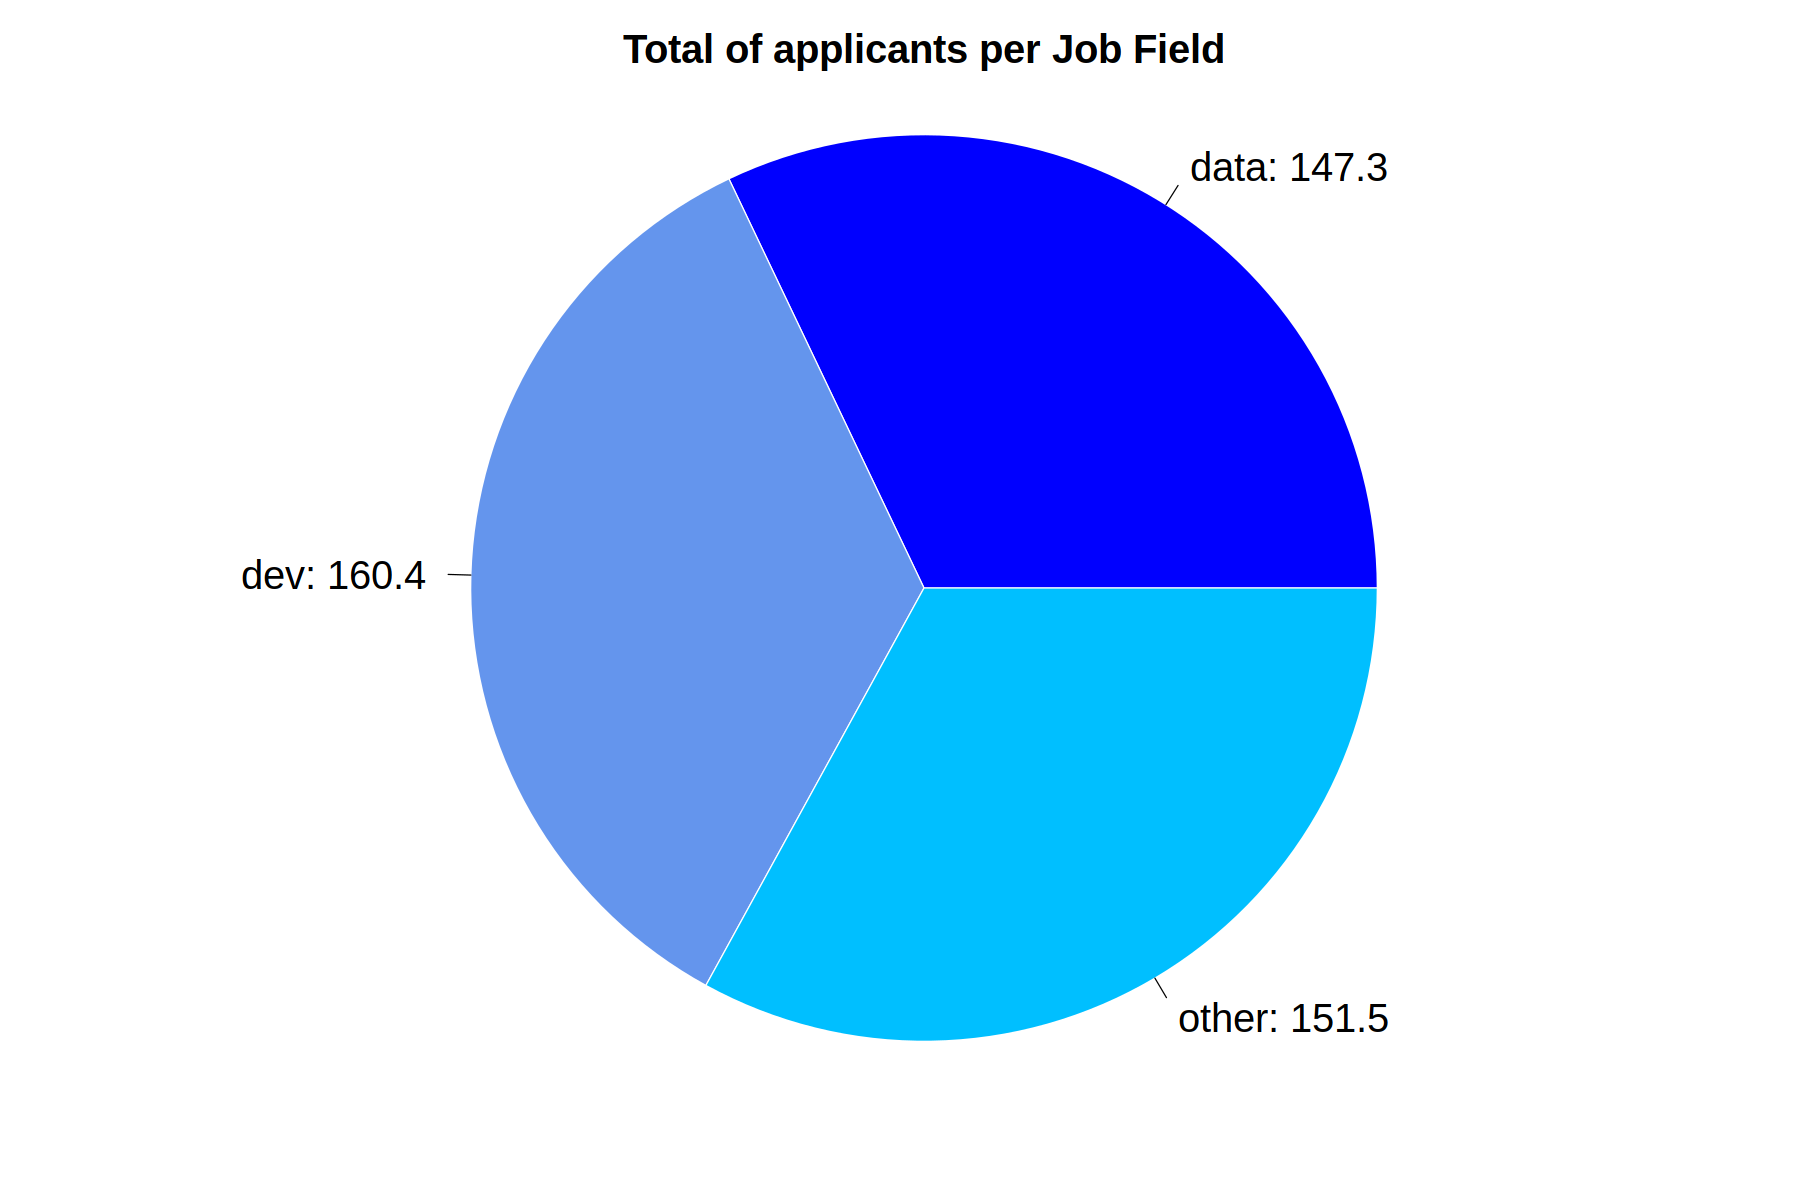

In [49]:
data_chart <- df %>% 
  group_by(job_field) %>% 
  summarise(applications = sum(no_of_application),
            amount_of_jobs = n()) %>% 
  mutate(no_of_applicants_per_job = applications / amount_of_jobs)

pie(data_chart$no_of_applicants_per_job,
    labels = paste(data_chart$job_field, round(data_chart$no_of_applicants_per_job, 1), sep = ": "), 
    border = "white", 
    col = c("blue","cornflowerblue","deepskyblue"), 
    radius = 1,
    cex = 2)
    title(main = "Total of applicants per Job Field",cex.main = 2)
    

**We see that Data field has more applicants per job**

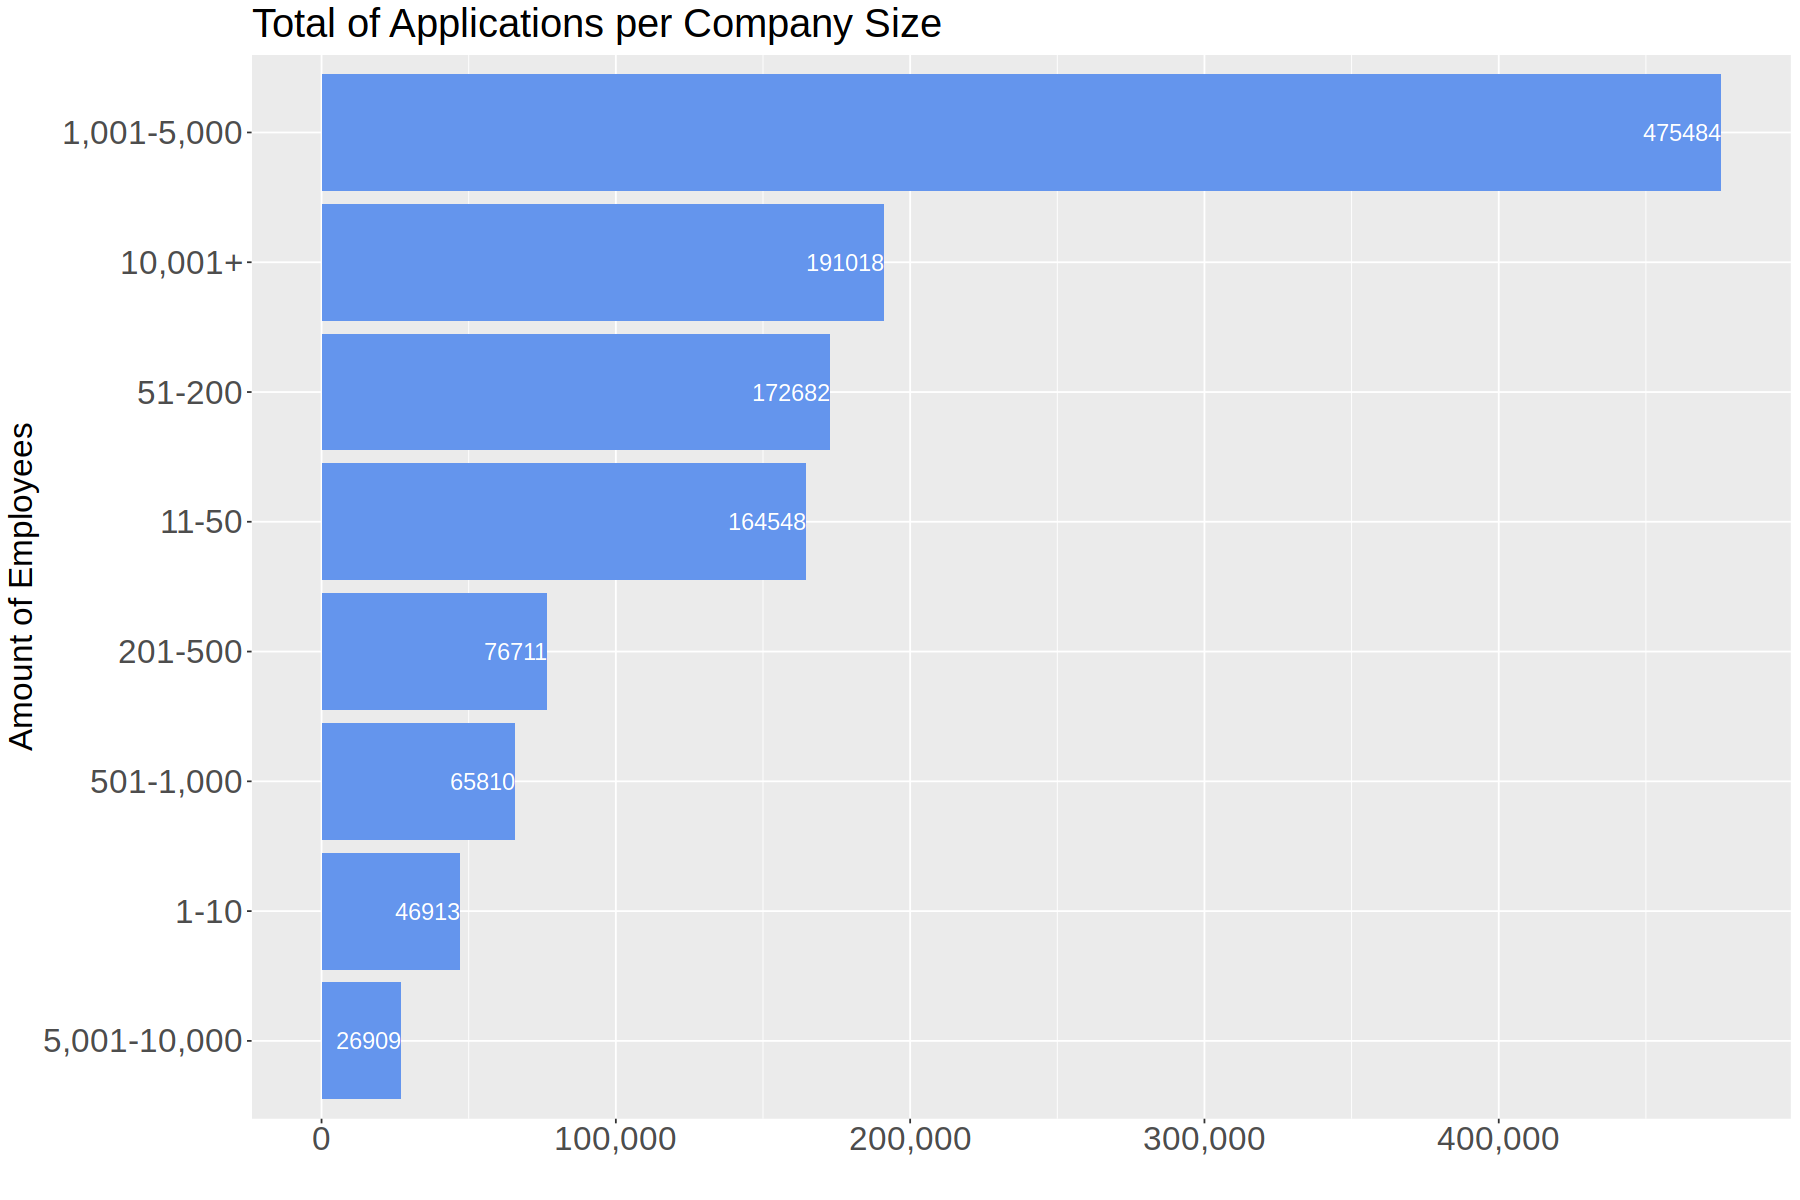

In [46]:
df %>% 
  group_by(no_employees) %>% 
  summarise(qtt = sum(no_of_application)) %>% 
ggplot(aes(qtt, reorder(no_employees, qtt)))+
  geom_col(fill = "cornflowerblue")+
  labs(title = "Total of Applications per Company Size")+
  geom_text(aes(label = qtt), hjust = 1, size = 5, color = "white")+
  xlab("")+
  ylab("Amount of Employees")+
  scale_x_continuous(labels = scales::comma)+
  theme(title = element_text(size = 20),
       axis.text = element_text(size = 20),
       legend.text = element_text(size = 15))